## CL2 - 1

In [1]:
with open('dna_sequence.txt','r') as file:
  dna_sequence = file.read().strip()

gc_content = (dna_sequence.count("G") + dna_sequence.count("C")) / len(dna_sequence) * 100
print("GC Content:",gc_content)

GC Content: 49.667405764966745


In [2]:
motifs_tofind = "CGT"
motifs_found = [str(i) for i in range(len(dna_sequence)) if dna_sequence.startswith(motifs_tofind,i)]
print(f"Motifs to find: {motifs_tofind} and the motifs at the position")

Motifs to find: CGT and the motifs at the position


## CL2 - 4

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('polymerase_cluster.csv')
df.head()

,index,ABS,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,1,abstract astrocytes produce granulocytemacroph...,-0.050448,0.017385,-0.039777,-0.067159,-0.029633,0.074573,-0.050444,-0.010799,-0.016189,0.040830,0.009979,-0.033770,0.013430,0.011744,-0.037619,-0.013475,-0.022964,-0.001030,-0.027048,-0.007250,0.002844,-0.001927,0.024008,0.056567,0.007435,-0.013699,-0.026742,-0.005136,0.020250,-0.006446,0,0,0,0,0,1,0,0,0,0
1,2,abstract replication of avian infectious bronc...,-0.128422,-0.084803,0.084813,-0.013748,0.006486,0.128668,0.032655,0.066775,0.038085,0.008261,-0.126150,-0.150300,0.065358,0.065503,-0.003198,-0.014290,-0.018733,0.011573,-0.002658,0.049191,0.011105,0.052557,-0.022118,0.000516,-0.057766,-0.056399,0.002794,0.006992,0.030501,-0.055875,0,0,0,0,0,1,0,0,0,0
2,3,abstract the infectivity of vesicular stomatit...,-0.095019,-0.032279,0.017571,-0.065860,0.001315,0.048199,-0.031072,0.010103,-0.013713,0.001040,0.021717,0.016886,0.004329,-0.002652,-0.001542,0.024925,0.024249,0.028607,0.040228,-0.006718,0.026309,0.031643,-0.024822,0.000128,-0.030027,-0.008914,0.017452,-0.005019,0.038202,-0.017136,0,0,0,0,0,1,0,0,0,0
3,4,abstract two temporally and enzymatically dist...,-0.134657,-0.086097,0.026415,-0.027553,-0.020280,-0.044637,-0.013312,-0.033345,0.019789,-0.011843,0.000766,-0.065593,0.044022,0.041427,-0.012988,-0.024744,0.001398,-0.008859,0.049476,0.022184,0.027098,0.048639,0.027083,0.030807,-0.037008,-0.012100,0.005392,0.031274,0.015159,-0.002906,0,0,0,0,0,0,1,0,0,0
4,5,abstract rnadependent rna polymerase rdrp acti...,-0.222713,-0.100353,0.107456,-0.079828,0.030818,-0.091040,-0.014809,0.012756,0.103606,-0.037955,0.120691,-0.111518,-0.044743,-0.011959,-0.057495,0.113481,-0.092513,-0.028506,0.034632,0.052612,0.086049,-0.042678,-0.004993,-0.009535,0.008584,-0.041467,0.095225,-0.065667,0.060550,-0.006368,0,0,0,0,0,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1941 non-null   int64  
 1   ABS     1941 non-null   object 
 2   0       1941 non-null   float64
 3   1       1941 non-null   float64
 4   2       1941 non-null   float64
 5   3       1941 non-null   float64
 6   4       1941 non-null   float64
 7   5       1941 non-null   float64
 8   6       1941 non-null   float64
 9   7       1941 non-null   float64
 10  8       1941 non-null   float64
 11  9       1941 non-null   float64
 12  10      1941 non-null   float64
 13  11      1941 non-null   float64
 14  12      1941 non-null   float64
 15  13      1941 non-null   float64
 16  14      1941 non-null   float64
 17  15      1941 non-null   float64
 18  16      1941 non-null   float64
 19  17      1941 non-null   float64
 20  18      1941 non-null   float64
 21  19      1941 non-null   float64
 22  

In [6]:
df.describe()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
count,1941.000000,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,971.000000,2.369912e-11,-1.597115e-11,2.575992e-12,4.636786e-12,-1.700155e-11,-2.369912e-11,-1.545595e-12,9.788769e-12,-2.885111e-11,-2.369912e-11,5.718702e-11,1.339516e-11,-2.369912e-11,-9.788769e-12,-3.606388e-12,-7.315817e-11,5.151983e-12,3.606388e-11,1.236476e-11,-5.667181e-12,1.236476e-11,-1.648635e-11,-1.081917e-11,-4.327666e-11,-1.030397e-12,2.679031e-11,1.030397e-11,-5.151989e-13,-4.739825e-11,-2.060793e-11,0.017002,0.136528,0.134982,0.084493,0.132406,0.217929,0.098403,0.022154,0.132406,0.023699
std,560.462755,1.332632e-01,9.854583e-02,8.434641e-02,8.368993e-02,7.889669e-02,7.804782e-02,7.508877e-02,7.051177e-02,6.963762e-02,6.907031e-02,6.680133e-02,6.528599e-02,6.460012e-02,6.357455e-02,6.311922e-02,6.086527e-02,6.004624e-02,5.895289e-02,5.874661e-02,5.738159e-02,5.712957e-02,5.638119e-02,5.508924e-02,5.446403e-02,5.427761e-02,5.365214e-02,5.315361e-02,5.237637e-02,5.211951e-02,5.209052e-02,0.129310,0.343436,0.341792,0.278197,0.339019,0.412945,0.297935,0.147221,0.339019,0.152149
min,1.000000,-2.843630e-01,-2.102710e-01,-2.596602e-01,-1.993367e-01,-2.029868e-01,-2.371054e-01,-2.551403e-01,-3.557127e-01,-2.134723e-01,-2.305063e-01,-2.950167e-01,-2.046644e-01,-2.573293e-01,-1.749607e-01,-2.352330e-01,-2.327779e-01,-2.165340e-01,-2.915156e-01,-3.179094e-01,-2.212571e-01,-2.097583e-01,-2.397248e-01,-2.060293e-01,-1.859370e-01,-2.047059e-01,-1.925704e-01,-1.829792e-01,-1.703974e-01,-2.113604e-01,-1.937596e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,486.000000,-1.014370e-01,-6.876699e-02,-5.667400e-02,-5.945025e-02,-4.654148e-02,-5.341692e-02,-4.745877e-02,-2.966343e-02,-4.166662e-02,-4.041846e-02,-3.777435e-02,-4.286121e-02,-2.853862e-02,-2.414389e-02,-3.137555e-02,-3.807474e-02,-3.445210e-02,-2.892603e-02,-2.965361e-02,-3.083631e-02,-3.156473e-02,-3.160857e-02,-3.462956e-02,-3.423888e-02,-3.085796e-02,-3.355355e-02,-3.155893e-02,-3.244509e-02,-2.727170e-02,-2.937484e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,971.000000,-1.601933e-02,-2.039921e-02,4.974860e-04,-1.250310e-02,-1.223933e-02,-6.558889e-03,-8.344065e-03,2.446330e-04,-4.359187e-03,4.510500e-04,-3.097203e-03,-1.681949e-03,-6.836050e-04,-4.427419e-03,5.727290e-04,-1.842389e-03,-4.291339e-03,1.468486e-03,-2.077699e-03,-1.873019e-03,-7.761300e-04,-9.980000e-05,1.131183e-03,4.310000e-05,-5.104730e-04,-1.750999e-03,2.332260e-04,-1.469604e-03,1.494017e-03,-3.252646e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1456.000000,9.605404e-02,5.053176e-02,5.724056e-02,4.785435e-02,3.250968e-02,4.813849e-02,4.151550e-02,3.008328e-02,3.327347e-02,4.034829e-02,3.291064e-02,3.801233e-02,2.449721e-02,1.484733e-02,3.390876e-02,3.556991e-02,3.200285e-02,3.184156e-02,2.899801e-02,2.785483e-02,2.927727e-02,2.810334e-02,3.472910e-02,3.054304e-02,3.271631e-02,3.023281e-02,3.365928e-02,2.822716e-02,2.953864e-02,2.635986e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1941.000000,3.895761e-01,3.434733e-01,2.696224e-01,3.071795e-01,4.022183e-01,3.589496e-01,3.193979e-01,4.162633e-01,4.378696e-01,2.667707e-01,2.992078e-01,2.382827e-01,3.844591e-01,5.924589e-01,3.202422e-01,3.016232e-01,3.151815e-01,3.053750e-01,3.579837e-01,3.281379e-01,2.516305e

In [7]:
df.isna().sum()

,0
index,0
ABS,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


In [8]:
df.columns

Index(['index', 'ABS', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', 'G1', 'G2', 'G3', 'G4', 'G5',
       'G6', 'G7', 'G8', 'G9', 'G10'],
      dtype='object')

## Spliting the Dataset

In [9]:
X = df[['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']]
y = df[['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
y_pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100}%")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Accuracy Score: 85.60411311053984%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      0.94      0.96        54
           2       0.96      0.96      0.96        52
           3       1.00      0.86      0.93        29
           4       1.00      0.86      0.92        50
           5       0.99      0.86      0.92        85
           6       1.00      0.78      0.88        37
           7       1.00      0.60      0.75        10
           8       1.00      0.78      0.88        59
           9       1.00      0.83      0.91         6

   micro avg       0.99      0.86      0.92       389
   macro avg       0.99      0.82      0.89       389
weighted avg       0.99      0.86      0.92       389
 samples avg       0.86      0.86      0.86       389



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## CL 2 - 5

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
text_document = "Text preprocessing is an essential step in natural language process"

In [30]:
words = word_tokenize(text_document)
words

['Text',
 'preprocessing',
 'is',
 'an',
 'essential',
 'step',
 'in',
 'natural',
 'language',
 'process']

In [31]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_words

['Text',
 'preprocessing',
 'essential',
 'step',
 'natural',
 'language',
 'process']

In [32]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
stemmed_words

['text', 'preprocess', 'essenti', 'step', 'natur', 'languag', 'process']

In [33]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
lemmatized_words

['Text',
 'preprocessing',
 'essential',
 'step',
 'natural',
 'language',
 'process']

## CL2 - 6

In [1]:
import re
from collections import defaultdict

documents = {
 1: "This is the first document. It contains some text.",
 2: "The second document is longer. It also contains some text.",
 3: "This is the third document. It is different from the first two.",
}

In [2]:
def preprocess_document(doc):
 # Convert to lowercase and tokenize
 tokens = re.findall(r'\w+', doc.lower())
 # Remove stop words (you can define your own list of stop words)
 stop_words = set(["is", "the", "it", "and", "some"])
 tokens = [token for token in tokens if token not in stop_words]
 return tokens

In [3]:
inverted_index = defaultdict(list)
for doc_id, doc_text in documents.items():
    tokens = preprocess_document(doc_text)
    for token in tokens:
        inverted_index[token].append(doc_id)

def retrieve_documents(query):
    query_tokens = preprocess_document(query)
    result = set()
    for token in query_tokens:
        if token in inverted_index:
            result.update(inverted_index[token])
    return list(result)

In [37]:
query = "document contains text"
matching_documents = retrieve_documents(query)

if matching_documents:
    print(f"Matching documents for query '{query}':")
    for doc_id in matching_documents:
        print(f"Document {doc_id}: {documents[doc_id]}")
else:
    print("No matching documents found.")

Matching documents for query 'document contains text':
Document 1: This is the first document. It contains some text.
Document 2: The second document is longer. It also contains some text.
Document 3: This is the third document. It is different from the first two.


## CL2 - 7

In [67]:
import numpy as np
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

data = pd.read_csv('heartdisease-IR.csv')
data.head()

,age,Gender,Family,diet,Lifestyle,cholestrol,heartdisease
0,0,0,1,1,3,0,1
1,0,1,1,1,3,0,1
2,1,0,0,0,2,1,1
3,4,0,1,1,3,2,0
4,3,1,1,0,0,2,0


In [68]:
model = BayesianNetwork([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family','heartdisease'),
    ('diet','cholestrol'),
    ('Lifestyle','diet'),
    ('cholestrol','heartdisease'),
    ('diet','cholestrol')
])

In [70]:
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(data, estimator=MaximumLikelihoodEstimator)


Learning CPD using Maximum likelihood estimators


In [71]:
print('\n Inferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

print('\n 1. Probability of HeartDisease given evidence = age')
q1= HeartDisease_infer.query(variables=['heartdisease'],evidence={'age':1})
print(q1)


 Inferencing with Bayesian Network:

 1. Probability of HeartDisease given evidence = age
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.4614 |
+-----------------+---------------------+
| heartdisease(1) |              0.5386 |
+-----------------+---------------------+


In [72]:
print('\n 2. Probability of HeartDisease given evidence= diet')
q2=HeartDisease_infer.query(variables=['heartdisease'],evidence={'diet':1})
print(q2)


 2. Probability of HeartDisease given evidence= diet
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3732 |
+-----------------+---------------------+
| heartdisease(1) |              0.6268 |
+-----------------+---------------------+


## CL2 - 8

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [40]:
df = pd.read_csv('email_spam.csv')
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [43]:
df.isna().sum()

,0
title,0
text,0
type,0


In [44]:
df.shape

(84, 3)

In [45]:
df.dtypes

,0
title,object
text,object
type,object


In [46]:
df.describe()

,title,text,type
count,84,84,84
unique,78,82,2
top,English,Model Casting Call\nThank you for taking the t...,not spam
freq,3,2,58


In [47]:
df.drop_duplicates(inplace=True)
df.shape

(83, 3)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['spam'] = df['type']
df['spam'] = le.fit_transform(df['spam'])
df.head()

,title,text,type,spam
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam,1
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam,0
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam,0
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam,0
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam,1


In [49]:
# SPlitting the data
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['spam'],test_size=0.2,random_state=42)

In [50]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
model = LogisticRegression()
model.fit(X_train_count,y_train)

LogisticRegression()

In [52]:
model.score(X_test_count,y_test)

0.8235294117647058

In [54]:
email = ['50% discount on data science courses singup now']
new_email = v.transform(email)
result = model.predict(new_email)
if result == 1:
  print('spam')
else:
  print("Not Spam")

spam


## CL2 - 9

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram,linkage

In [59]:
iris = datasets.load_iris()
X = iris.data

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

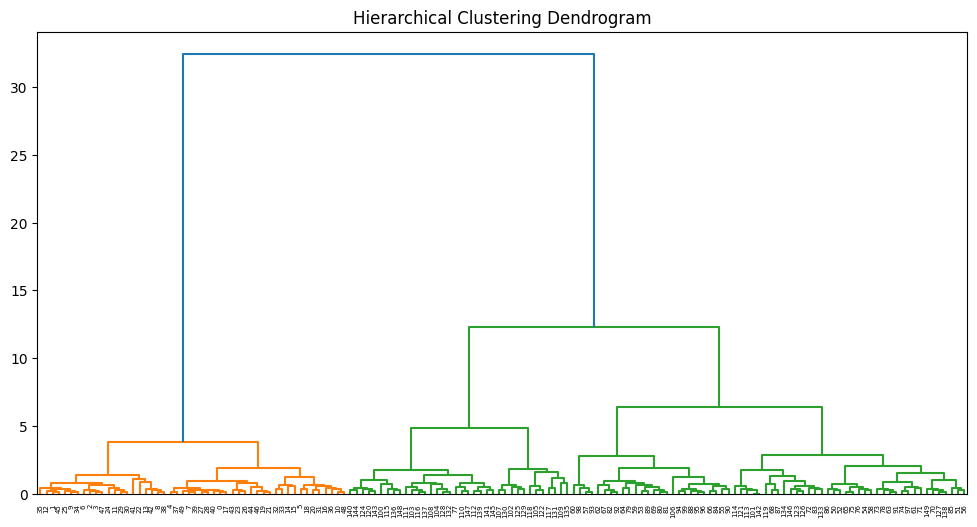

In [61]:
# Perform Hierarchical Clustering
linkage_matrix = linkage(X,method='ward')
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

In [64]:
# Fit the Agglomerative Ckustering Model
n_cluster = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_cluster,linkage='ward')
agg_clustering.fit(X)

# Assigning Cluster Labels
cluster_labels = agg_clustering.labels_

# Print cluster assignments for each data point
for i in range(len(X)):
  print(f"Data point {i} is assigned to cluster {cluster_labels[i]}")

Data point 0 is assigned to cluster 1
Data point 1 is assigned to cluster 1
Data point 2 is assigned to cluster 1
Data point 3 is assigned to cluster 1
Data point 4 is assigned to cluster 1
Data point 5 is assigned to cluster 1
Data point 6 is assigned to cluster 1
Data point 7 is assigned to cluster 1
Data point 8 is assigned to cluster 1
Data point 9 is assigned to cluster 1
Data point 10 is assigned to cluster 1
Data point 11 is assigned to cluster 1
Data point 12 is assigned to cluster 1
Data point 13 is assigned to cluster 1
Data point 14 is assigned to cluster 1
Data point 15 is assigned to cluster 1
Data point 16 is assigned to cluster 1
Data point 17 is assigned to cluster 1
Data point 18 is assigned to cluster 1
Data point 19 is assigned to cluster 1
Data point 20 is assigned to cluster 1
Data point 21 is assigned to cluster 1
Data point 22 is assigned to cluster 1
Data point 23 is assigned to cluster 1
Data point 24 is assigned to cluster 1
Data point 25 is assigned to cluste